In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [23]:
data_name = "transformed_business_im"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

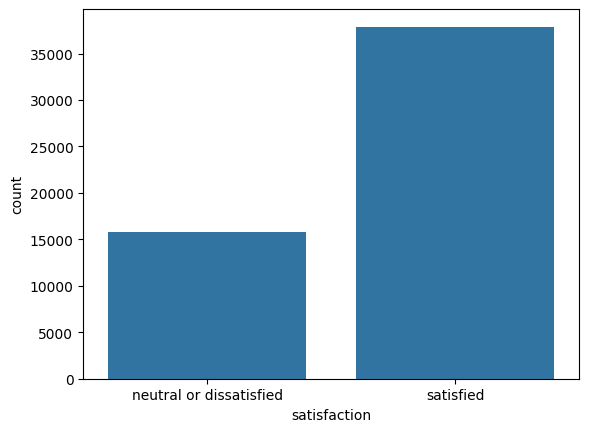

In [24]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [25]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53714,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,1,39,404,0
53715,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,52,280,0
53716,0,0,0,1,0,0,0,0,0,1,...,1,0,0,1,1,0,1,34,526,0
53717,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,23,646,0


In [26]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
53714    neutral or dissatisfied
53715                  satisfied
53716    neutral or dissatisfied
53717                  satisfied
53718                  satisfied
Name: satisfaction, Length: 53719, dtype: object

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (37603, 77) and test set is :(16116, 77)


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.20685694, -0.47094479, -0.53044051, ...,  0.7329855 ,
         1.01603759, -0.39213549],
       [-0.20685694, -0.47094479,  1.88522554, ..., -0.91191218,
        -0.84894383, -0.53324318],
       [-0.20685694, -0.47094479, -0.53044051, ...,  0.26301474,
        -1.03447017, -0.53324318],
       ...,
       [-0.20685694, -0.47094479, -0.53044051, ...,  1.90791242,
         0.78192102, -0.53324318],
       [-0.20685694,  2.12339114, -0.53044051, ..., -1.46021141,
         0.74834959, -0.53324318],
       [-0.20685694, -0.47094479, -0.53044051, ..., -0.59859834,
        -0.71112426, -0.53324318]])

## Set paramiter CV

In [29]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## K-NN(K Nearest Neighbours)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.041430 วินาที


In [31]:

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy_KNN=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 95.92 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.93      0.93      4742
              satisfied       0.97      0.97      0.97     11374

               accuracy                           0.96     16116
              macro avg       0.95      0.95      0.95     16116
           weighted avg       0.96      0.96      0.96     16116



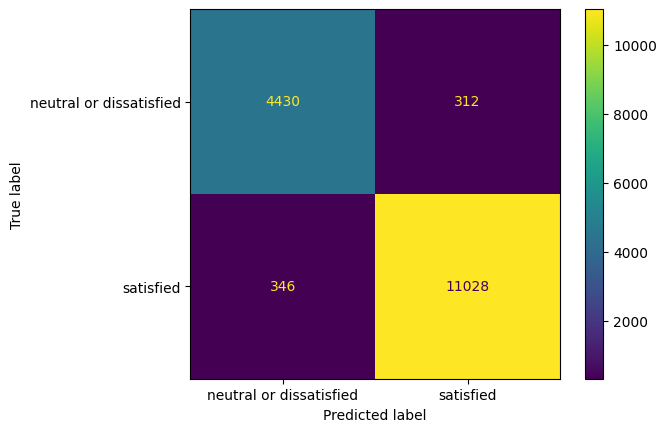

In [32]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_knn.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

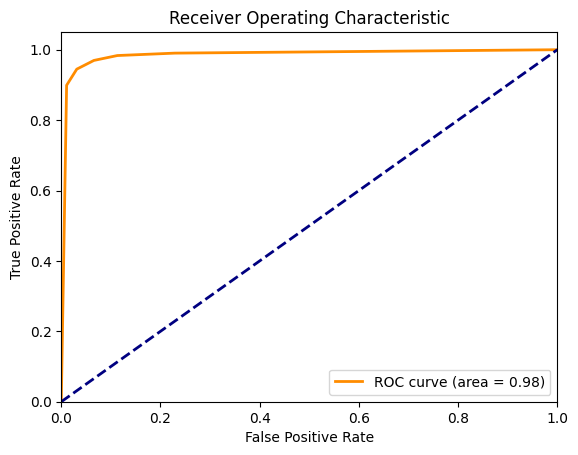

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# แปลง y_test เป็นค่าตัวเลข
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# ทำนายโอกาสของแต่ละ class
y_prob = model_knn.predict_proba(X_test)[:, 1]

# คำนวณ ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# แสดงกราฟ ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [34]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_knn = cross_val_score(model_knn, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_KNN = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_KNN:.6f} วินาที")


Cross Validation Scores (KNN): [0.9621061  0.95452732 0.96489828 0.9621061  0.96051057 0.95692062
 0.95452732 0.95492621 0.96250499 0.96330275 0.96130834 0.9621061
 0.95692062 0.95610535 0.96009577]
Mean CV Accuracy: 0.9595
Standard Deviation CV Accuracy: 0.0034
เวลาที่ใช้ในการทำ Cross Validation: 2.725900 วินาที


In [35]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, model_knn.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9710927319628753
Test Accuracy: 0.9591710101762224


## Save Model Predic

In [36]:
import pickle
pickle_out = open("../../pipelines/model_KNN_business.pkl", mode = "wb")
pickle.dump(model_knn, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_KNN.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [37]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
29586,0,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,43,220,10,satisfied
38512,0,0,0,0,1,0,0,1,0,0,...,1,1,0,1,0,1,18,1167,0,satisfied
36374,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,36,533,0,satisfied
3343,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,1,43,937,0,satisfied
38572,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,31,296,0,satisfied
20297,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,36,2236,0,neutral or dissatisfied
18562,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,27,569,0,neutral or dissatisfied
31792,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,35,3125,27,neutral or dissatisfied
6388,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,40,926,0,satisfied
3910,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,1,71,3180,0,satisfied


In [38]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
29586,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,43,220,10
38512,0,0,0,0,1,0,0,1,0,0,...,0,1,1,0,1,0,1,18,1167,0
36374,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,36,533,0
3343,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,43,937,0
38572,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,31,296,0
20297,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,36,2236,0
18562,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,27,569,0
31792,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,35,3125,27
6388,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,40,926,0
3910,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,1,71,3180,0


In [39]:
y_sam = df_sam.iloc[:,-1]
y_sam


29586                  satisfied
38512                  satisfied
36374                  satisfied
3343                   satisfied
38572                  satisfied
20297    neutral or dissatisfied
18562    neutral or dissatisfied
31792    neutral or dissatisfied
6388                   satisfied
3910                   satisfied
13316                  satisfied
51540                  satisfied
18404    neutral or dissatisfied
6028                   satisfied
16026    neutral or dissatisfied
36606                  satisfied
3051     neutral or dissatisfied
43808                  satisfied
17883                  satisfied
52239                  satisfied
Name: satisfaction, dtype: object

In [40]:
model = pickle.load(open("../../pipelines/model_KNN_business.pkl", 'rb'))
scaler_1 = pickle.load(open("../../pipelines/scaler_KNN.pkl", 'rb'))

scaler_new = scaler_1.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

['satisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'satisfied' 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied']
Accuracy of Knn is : 100.0 % .
